<a href="https://colab.research.google.com/github/UmbraVenus/DreamscapeColab/blob/main/flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x
!pip3 install --quiet ml4a

TensorFlow 1.x selected.
     |████████████████████████████████| 1.1 MB 9.0 MB/s 
     |████████████████████████████████| 132 kB 94.4 MB/s 
     |████████████████████████████████| 561 kB 67.9 MB/s 
     |████████████████████████████████| 108 kB 77.3 MB/s 
     |████████████████████████████████| 241 kB 76.6 MB/s 
     |████████████████████████████████| 411.5 MB 7.5 kB/s 
     |████████████████████████████████| 636 kB 91.7 MB/s 
     |████████████████████████████████| 118 kB 75.5 MB/s 
     |████████████████████████████████| 5.6 MB 59.8 MB/s 
     |████████████████████████████████| 829 kB 95.9 MB/s 
     |████████████████████████████████| 722 kB 62.8 MB/s 
     |████████████████████████████████| 100.1 MB 12 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensorflow 1.15.2 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install https://github.com/podgorskiy/dnnlib/releases/download/0.0.1/dnnlib-0.0.1-py3-none-any.whl

In [ ]:
from ml4a.models import stylegan2

# replace 'images_folder' and 'dataset_output' with your own locations.

"""
config = {
    'images_folder': '/content/drive/MyDrive/gd/images/',
    'dataset_output': '/content/drive/MyDrive/gd/wikiart2/',
    'transform': 'center-crop',
    'labels': True,
    'size': 512
}

try:
    stylegan.dataset_tool(config)
except ValueError as e:
"""
stylegan2.get_pretrained_models()   

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3514368/45929032 bytes (7.7%)7741440/45929032 bytes (16.9%)11952128/45929032 bytes (26.0%)16080896/45929032 bytes (35.0%)20242432/45929032 bytes (44.1%)24158208/45929032 bytes (52.6%)28418048/45929032 bytes (61.9%)32604160/45929032 bytes (71.0%)36724736/45929032 bytes (80.0%)40755200/45929032 bytes (88.7%)44892160/45929032 bytes (97.7%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

dict_keys(['cars', 'cats', 'churches', 'horses', 'ffhq', 'landscapes', 'wikiarts'])

In [ ]:
from ml4a.models import stylegan
network_pkl = stylegan2.get_pretrained_model('wikiarts')
stylegan2.load_model(network_pkl)










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


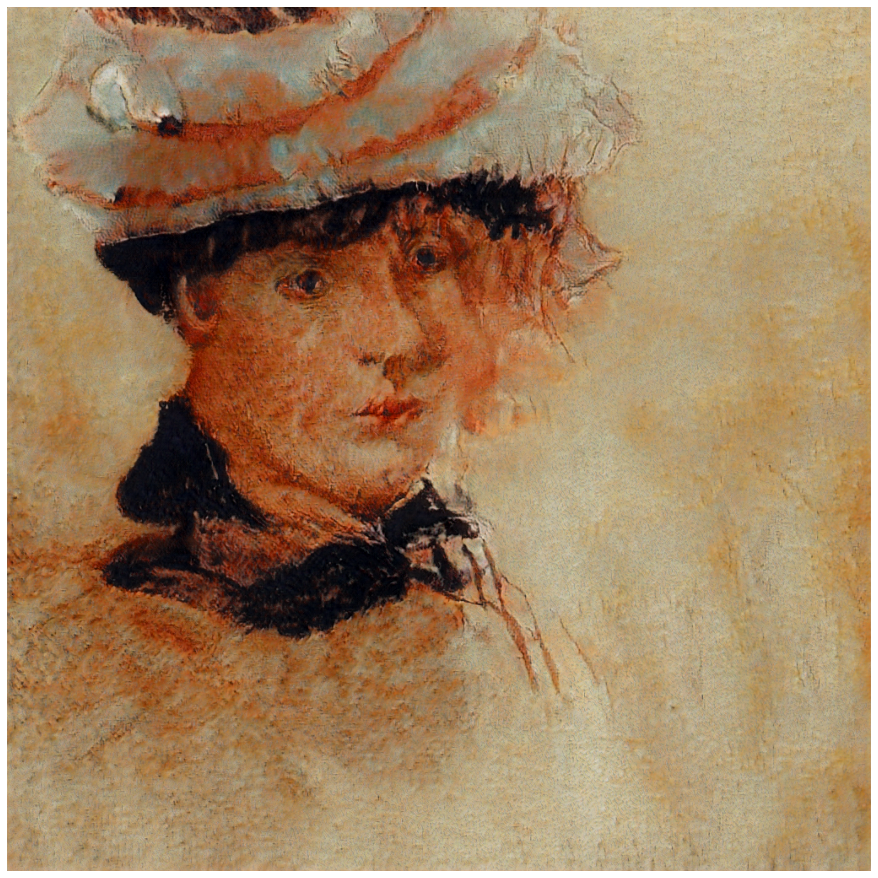

In [ ]:
from ml4a import image
from PIL import Image
import numpy as np
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt
from datetime import date
samples = stylegan2.random_sample(num_images = 1, label=None)

i = 0

os.mkdir("drive/MyDrive/gd/ml4a/generated/"+str(date.now()))

while i < 5:
    fig = plt.figure(frameon=False)
    fig.set_size_inches(12,12)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)

    ax.imshow(samples[0][0], aspect='auto')
    plt.savefig("drive/MyDrive/gd/ml4a/generated/"+str(date.now())+"/" +str(i)+".png",dpi=100)
    i+=1

In [ ]:
from ml4a import image
from ml4a.models import neural_style

neural_style.params.gpu = '0'
neural_style.params.backend = 'cudnn'

In [ ]:
import torch, gc

gc.collect()
torch.cuda.empty_cache()

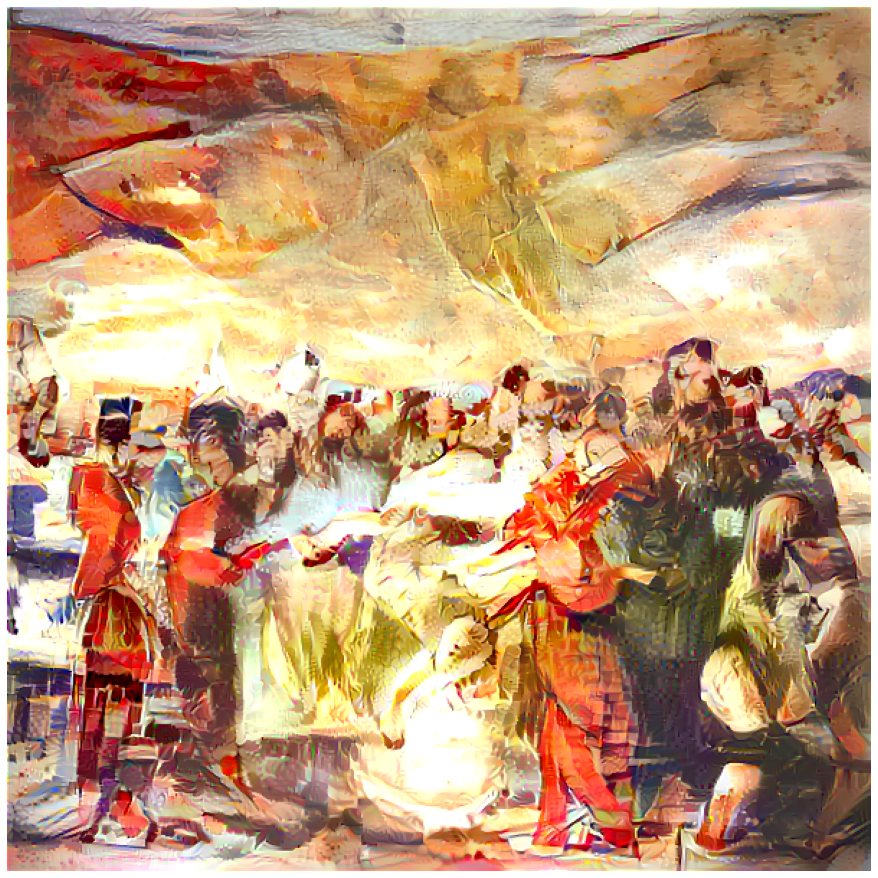

In [ ]:
import torch, gc

gc.collect()
torch.cuda.empty_cache()

config = {
    'size': 600,
    'content_image': "drive/MyDrive/gd/ml4a/generated/20210826/4.png",
    'style_images': "drive/MyDrive/gd/ml4a/generated/20210826/girl with a kite.jpg",
    'num_iterations': [1000, 750, 500],
    'num_octaves': 3,
    'octave_ratio': 2.0,
}

output_image = neural_style.run(config)

output_size = image.get_size(output_image)


fig = plt.figure(frameon=False)
fig.set_size_inches(12,12)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(output_image, aspect='auto')
plt.savefig("drive/MyDrive/gd/AIArtist/0826/4.png",dpi=200)

In [ ]:
import torch, gc

gc.collect()
torch.cuda.empty_cache()

from ml4a import image
from ml4a.models import esrgan
from PIL import Image

img1 = image.load_image("drive/MyDrive/gd/ml4a/generated/20210826/output/0.png")
img2 = esrgan.run(img1)

img2 = Image.fromarray(img2.astype(np.uint8)).convert('RGB')
img2.save("drive/MyDrive/gd/AIArtist/0826/0.png")

RuntimeError: ignored

In [ ]:
from PIL import Image
c = Image.open("/content/drive/MyDrive/gd/ml4a/generated/20210826/output/0.png")
d = c.resize((4096,4096), resample=Image.BOX)
d.save("drive/MyDrive/gd/AIArtist/0826/0.png",dpi=(1000,1000))